In [1]:
!pip install --upgrade tensorflow
!pip install imbalanced-learn
!pip install tensorflow scikit-learn

In [2]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

2023-06-16 20:40:16.285640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 20:40:33.390674: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-06-16 20:40:33.391913: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [3]:
data = []

with open('Dataset.csv', 'r') as file:
    lines = file.readlines()
    for line in lines:
        line = line.strip()  # Menghapus karakter newline pada akhir baris
        if line:
            food, attributes = line.split(' (', 1)
            food = food.strip()
            attributes = attributes.replace(')', '')
            data.append((food, tuple(attributes.split(', '))))

# Cetak hasil atau lakukan operasi lain dengan data
#for food, attributes in data:
#    print(f"{food} = {attributes}")

In [4]:
# Mengubah sifat-sifat menjadi one-hot encoding
all_attributes = [attributes for _, attributes in data]
mlb = MultiLabelBinarizer()
encoded_X = mlb.fit_transform(all_attributes)

# Mengambil nama makanan sebagai label (Y)
y = [food for food, _ in data]

# Melakukan encoding label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Cetak hasil one-hot encoding
#for i, (food, attributes) in enumerate(data):
#    print(f"{food} = {attributes} (One-Hot Encoding: {encoded_X[i].tolist()})")

In [5]:
# Melakukan train-test split
X_train, X_test, Y_train, Y_test = train_test_split(encoded_X, y, test_size=0.2)

# Mengonversi data menjadi array NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Membangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Menampilkan pasangan input-output
#for x, y in zip(X_train, Y_train):
#    print("Input:", x)
#    print("Output:", y)
#    print("-" * 10)
#print("-------------------------------------------")
# Menampilkan pasangan input-output pada data test
#for x, y in zip(X_test, Y_test):
#    print("Input:", x)
#    print("Output:", y)
#    print("-" * 10)

2023-06-16 20:40:46.150313: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-06-16 20:40:46.169879: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-16 20:40:46.170017: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vmbangkit): /proc/driver/nvidia/version does not exist
2023-06-16 20:40:46.251840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the approp

Epoch 1/100
102/102 [==============================] - 4s 10ms/step - loss: 5.6807 - accuracy: 0.0448 - val_loss: 4.8471 - val_accuracy: 0.0812
Epoch 2/100
102/102 [==============================] - 1s 7ms/step - loss: 4.0213 - accuracy: 0.1932 - val_loss: 3.2347 - val_accuracy: 0.2951
Epoch 3/100
102/102 [==============================] - 1s 7ms/step - loss: 2.4329 - accuracy: 0.4450 - val_loss: 1.8434 - val_accuracy: 0.5639
Epoch 4/100
102/102 [==============================] - 1s 7ms/step - loss: 1.3703 - accuracy: 0.6544 - val_loss: 1.1294 - val_accuracy: 0.7154
Epoch 5/100
102/102 [==============================] - 1s 6ms/step - loss: 0.9340 - accuracy: 0.7370 - val_loss: 0.9000 - val_accuracy: 0.7494
Epoch 6/100
102/102 [==============================] - 1s 7ms/step - loss: 0.7545 - accuracy: 0.7712 - val_loss: 0.7377 - val_accuracy: 0.7864
Epoch 7/100
102/102 [==============================] - 1s 7ms/step - loss: 0.6691 - accuracy: 0.7803 - val_loss: 0.6649 - val_accuracy: 0.788

Epoch 58/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4321 - accuracy: 0.8153 - val_loss: 0.4163 - val_accuracy: 0.8127
Epoch 59/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4318 - accuracy: 0.8113 - val_loss: 0.4340 - val_accuracy: 0.8151
Epoch 60/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4334 - accuracy: 0.8115 - val_loss: 0.4092 - val_accuracy: 0.8188
Epoch 61/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4333 - accuracy: 0.8147 - val_loss: 0.4247 - val_accuracy: 0.8204
Epoch 62/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4293 - accuracy: 0.8156 - val_loss: 0.4230 - val_accuracy: 0.8111
Epoch 63/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4287 - accuracy: 0.8151 - val_loss: 0.4051 - val_accuracy: 0.8272
Epoch 64/100
102/102 [==============================] - 1s 7ms/step - loss: 0.4299 - accuracy: 0.8132 - val_loss: 0.4006 - val_accuracy:

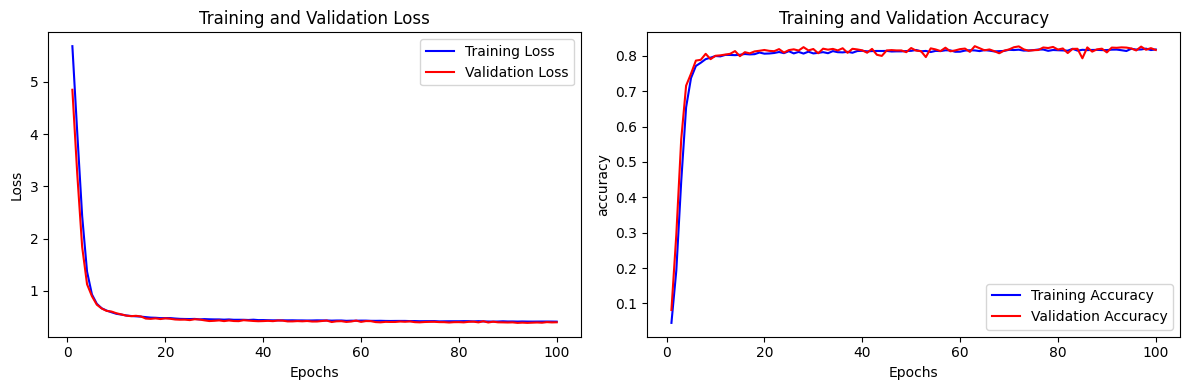

In [6]:
# Mengkompilasi model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=128)

# Visualisasi kurva pelatihan dan validasi
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Melakukan prediksi pada data uji
predictions = model.predict(X_test)

# Mengambil kelas dengan probabilitas tertinggi untuk setiap prediksi
predicted_classes = np.argmax(predictions, axis=1)

# Mendekode kelas prediksi menjadi label asli
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Mengambil probabilitas tertinggi untuk setiap prediksi
top_probabilities = np.max(predictions, axis=1)

# Menggabungkan prediksi dengan probabilitasnya
predictions_with_probabilities = list(zip(predicted_labels, top_probabilities))

# Mengurutkan prediksi berdasarkan probabilitas tertinggi
top_predictions = sorted(predictions_with_probabilities, key=lambda x: x[1], reverse=True)

# Menulis data ke dalam file CSV
with open("Hasil_Rekomendasi.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(top_predictions)

102/102 [==============================] - 0s 1ms/step


In [8]:
# Menghasilkan prediksi untuk data pengujian
Y_pred = model.predict(X_test)

# Mengonversi prediksi menjadi label kelas tunggal
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Menghasilkan classification report
report = classification_report(Y_test, Y_pred_classes)
print(report)

102/102 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00         5
           7       0.40      1.00      0.57         2
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         3
          17       1.00      0.33      0.50         6
          18       1.00   

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1